# Reading Data

In [1]:
library("ggplot2")
library("reshape")
library("dplyr")
library("rstatix")


Attaching package: ‘dplyr’


The following object is masked from ‘package:reshape’:

    rename


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [2]:
aMat<-read.csv("PostQuestion.csv")


for (i in 6:10){
    aMat[,i]<-as.integer(aMat[,i])
}


In [3]:
head(aMat)


,Session,SessionOrder,ID,Condition,Length,Width,Thickness,Color,Shape,HunterInfo
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,B,1,B1,0,5,6,5,3,5,NA
2,B,2,B2,0,5,6,6,1,2,NA
3,B,3,B3,0,6,4,6,7,5,NA
4,B,4,B4,0,5,7,7,2,5,NA
5,B,5,B5,0,6,5,5,2,4,NA
6,B,6,B6,0,7,7,7,5,5,NA


In [4]:
CPalet<-c('#009E73','#56B4E9','#CC6677')

In [5]:
dim(aMat)

[1] 119  10

In [6]:
table(aMat$Condition)


 0  1  2 
39 40 40 

## formatting the data frame

In [7]:
library(reshape)
tdMat<-melt(aMat,  id.vars = colnames(aMat[1:4]))
tdMat$value<-as.integer(tdMat$value)
colnames(tdMat)[5]<-"Item"

tdMat[tdMat$Condition == 0,]$Condition<-  "Asocial"
tdMat[tdMat$Condition == 1,]$Condition<-  "Negative"
tdMat[tdMat$Condition == 2,]$Condition<-  "Positive"

tdMat<-subset(tdMat, !is.na(tdMat$value))

In [8]:
head(tdMat)

,Session,SessionOrder,ID,Condition,Item,value
,<chr>,<int>,<chr>,<chr>,<fct>,<int>
1,B,1,B1,Asocial,Length,5
2,B,2,B2,Asocial,Length,5
3,B,3,B3,Asocial,Length,6
4,B,4,B4,Asocial,Length,5
5,B,5,B5,Asocial,Length,6
6,B,6,B6,Asocial,Length,7


# Visualization

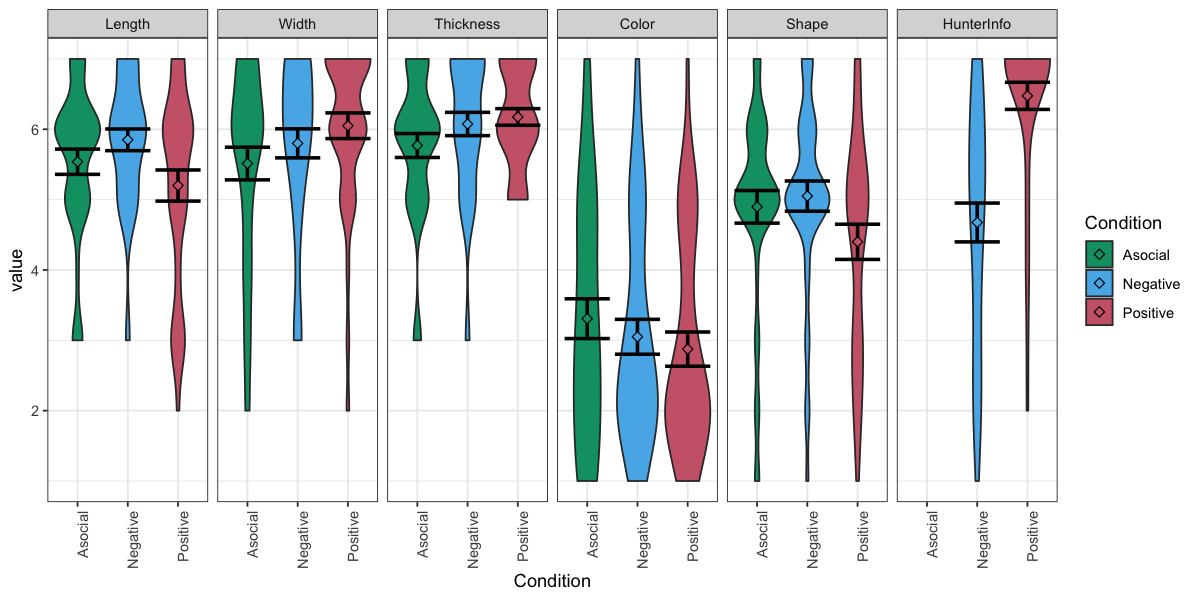

In [9]:
 options(repr.plot.width=10, repr.plot.height=5)
p <- ggplot(tdMat, aes(y = value, x = Condition, fill  = Condition)) +
    geom_violin(alpha=1) +
    stat_summary(fun = mean,
               fun.min = function(y) mean(y) - sd(y)/sqrt(length(y)), 
               fun.max = function(y) mean(y) + sd(y)/sqrt(length(y)), 
               geom = "errorbar", color = "black", size = 1) +
 stat_summary(fun = mean, geom = "point", shape=23, size=2, color = "black")+ 
facet_grid(.~Item ) +
scale_color_manual(values = CPalet, name = "Condition",labels = c("Asocial", "Negative","Positive"))+
scale_fill_manual(values = CPalet, name = "Condition",labels = c("Asocial", "Negative","Positive"))+
theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))
p

# Descriptive statistics  for the table

In [10]:
tdMat %>%
  group_by(Condition, Item) %>%
  get_summary_stats(value, type = "mean_sd")

Condition,Item,variable,n,mean,sd
<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>
Asocial,Length,value,39,5.538,1.120
Asocial,Width,value,39,5.513,1.449
Asocial,Thickness,value,39,5.769,1.063
Asocial,Color,value,39,3.308,1.764
Asocial,Shape,value,39,4.897,1.447
Negative,Length,value,40,5.850,0.975
Negative,Width,value,40,5.800,1.305
Negative,Thickness,value,40,6.075,1.047
Negative,Color,value,40,3.050,1.568


# One sample t-test

- Checking If usefulness of other hunters' information is significantly higher than the neutral value (=4)

In [11]:
negative_Huter_value<-tdMat[(tdMat$Item == "HunterInfo")&(tdMat$Condition == "Negative"),]$value 

positive_Huter_value<-tdMat[(tdMat$Item == "HunterInfo")&(tdMat$Condition == "Positive"),]$value 


## negative condition

In [12]:
t.test(negative_Huter_value , mu=4)
sd(negative_Huter_value)
effsize::cohen.d(negative_Huter_value, mu=4, f =NA)


	One Sample t-test

data:  negative_Huter_value
t = 2.4463, df = 39, p-value = 0.01905
alternative hypothesis: true mean is not equal to 4
95 percent confidence interval:
 4.116877 5.233123
sample estimates:
mean of x 
    4.675 


[1] 1.74514


Cohen's d (single sample)

d estimate: 0.3867885 (small)
Reference mu: 4
95 percent confidence interval:
     lower      upper 
-0.2587956  1.0323726 


## positive condition

In [13]:
t.test(positive_Huter_value , mu=4)
sd(positive_Huter_value )
effsize::cohen.d(positive_Huter_value, mu=4, f =NA)


	One Sample t-test

data:  positive_Huter_value
t = 12.839, df = 39, p-value = 1.388e-15
alternative hypothesis: true mean is not equal to 4
95 percent confidence interval:
 6.085069 6.864931
sample estimates:
mean of x 
    6.475 


[1] 1.219237


Cohen's d (single sample)

d estimate: 2.029958 (large)
Reference mu: 4
95 percent confidence interval:
   lower    upper 
1.242643 2.817274 


### Proportion / Frequency of choosing maximum point in the positive condition

In [14]:
table(positive_Huter_value)
32/40

positive_Huter_value
 2  3  4  5  6  7 
 1  1  2  2  2 32 

[1] 0.8